In [25]:
from numpy import array
from numpy import matmul
from qiskit.quantum_info import Statevector
from numpy import sqrt
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit

ket0 = array([1, 0])
ket1 = array([0, 1])
display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [26]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

In [27]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [28]:

display(matmul(M1, ket1))


array([1, 0])

In [29]:
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
display(u.draw("latex"))
display(v.draw("text"))
display(u.is_valid())

v.measure()


<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

True

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 590, '1': 410}

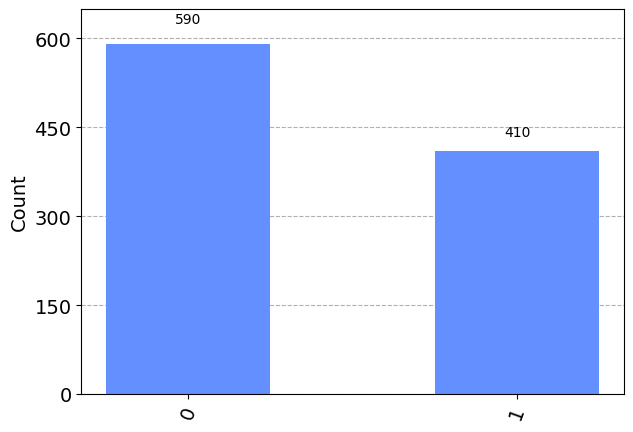

In [30]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [31]:
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

# this is a sequencial evolution
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex") # v.draw('text)

<IPython.core.display.Latex object>

In [34]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw(output='text')
# circuit.draw(output='latex')

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [38]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")
v.measure()


('0',
 Statevector([0.92387953+0.38268343j, 0.        +0.j        ],
             dims=(2,)))

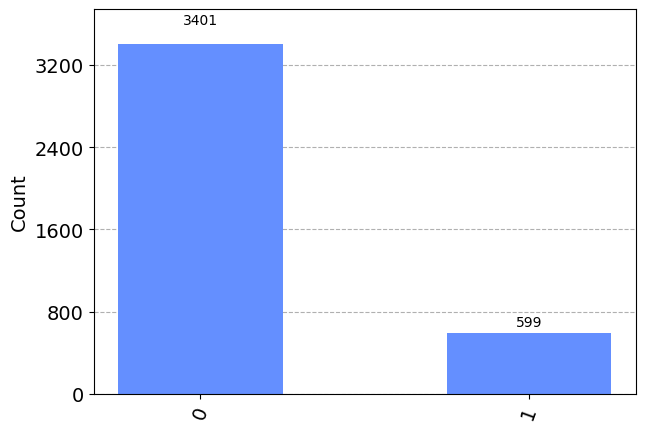

In [39]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)